In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

import time
from functools import wraps
  
def fn_timer(function):
  @wraps(function)
  def function_timer(*args, **kwargs):
    t0 = time.process_time()
    result = function(*args, **kwargs)
    t1 = time.process_time()
    print ("Total time running %s: %s s" %
        (function.__name__, str(t1-t0))
        )
    return result
  return function_timer

# 2.1 插入排序

## insertion sort

In [2]:
def insertion_sort(A):
    for i in range(1, len(A)):
        key = A[i]
        j = i - 1
        while j >= 0 and A[j] > key:
            A[j+1] = A[j]
            j -= 1
        A[j+1] = key

## *test insertion sort*

In [3]:
A = [random.randint(0,100) for i in range(10)]
print("排序前：\t" + str(A))
fn_timer(insertion_sort)(A)
print("插入排序后:\t" + str(A))

排序前：	[78, 57, 21, 21, 54, 69, 59, 70, 40, 59]
Total time running insertion_sort: 0.0 s
插入排序后:	[21, 21, 40, 54, 57, 59, 59, 69, 70, 78]


In [4]:
A = [random.random() for i in range(2**14)]
fn_timer(insertion_sort)(A)

Total time running insertion_sort: 7.8125 s


## 2.1-1 反向插入排序

- 反向插入排序

In [5]:
def insertion_sort_reverse(A):
    for i in range(1, len(A)):
        key = A[i]
        j = i - 1
        while j >=0 and A[j] < key:
            A[j+1] = A[j]
            j -= 1
        A[j+1] = key
    return A

In [6]:
A = [random.randint(0,100) for i in range(10)]
print("排序前: \t\t" + str(A))
print("非升序插入排序后:\t" + str(insertion_sort_reverse(A)))

排序前: 		[72, 28, 62, 33, 11, 79, 8, 6, 24, 21]
非升序插入排序后:	[79, 72, 62, 33, 28, 24, 21, 11, 8, 6]


## 2.1-4 二进制数组相加

In [7]:
def add_binarys(A, B):
    carry = 0  # 进位标志
    C = [0 for i in range(len(A) + 1)]
    for i in reversed(range(len(A))):
        res = A[i] + B[i] + carry
        C[i+1] = res % 2
        carry = 1 if res > 1 else 0
    C[0] = carry
    return C
        

In [8]:
A = [random.randint(0,1) for i in range(3)]
B = [random.randint(0,1) for i in range(3)]
print("A: " + str(A) + "\n" + "B: " + str(B))
C = add_binarys(A, B)
print("C: " + str(C))

A: [1, 0, 0]
B: [0, 0, 1]
C: [0, 1, 0, 1]


# 2.2 分析算法

## 2.2-2 选择排序

- 维持的循环不变式是 A[0:i-1] 均是已排好序的数组，且 A[i:len(A)-1] 中的元素均比 A[0:i-1] 中大
- 只对前 n-1 个元素运行的原因时，当前 n-1 个元素排好序后，第 n 个即为最大值
- 最好和最坏的运行时间均为 $ \Theta(n^2) $

### selection sort

In [9]:
@fn_timer
def selection_sort(A):
    for i in range(len(A) - 1):
        min = A[i]
        for j in range(i + 1, len(A)):
            if A[j] < min:
                min = A[j]
                A[i], A[j] = A[j], A[i]

### *test selection sort*

In [10]:
A = [random.randint(0,100) for i in range(10)]
print("排序前：\t" + str(A))
selection_sort(A)
print("插入排序后:\t" + str(A))

排序前：	[83, 16, 58, 72, 54, 13, 70, 3, 87, 52]
Total time running selection_sort: 0.0 s
插入排序后:	[3, 13, 16, 52, 54, 58, 70, 72, 83, 87]


In [11]:
A = [random.random() for i in range(2**14)]
selection_sort(A)

Total time running selection_sort: 10.109375 s


## 2.2-3 线性查找

- 平均情况需要查找 $ \frac{n}{2} $ 个元素
- 最坏情况需要查找 $ n $ 个元素
- 平均情况和最环情况的运行时间均为 $ \Theta(n) $

# 2.3 设计算法

## 2.3.1 分治法

### 合并排序

#### merge

In [12]:
def merge(A, p, q, r):
    L = A[p:q+1]
    L.append(float('inf'))
    R = A[q+1:r+1]
    R.append(float('inf'))
    i = j = 0
    for k in range(p,r+1):
        if L[i] < R[j]:
            A[k] = L[i]
            i += 1
        else:
            A[k] = R[j]
            j += 1

#### *test merge*

In [13]:
left = sorted([random.randint(0,100) for i in range(7)])
right = sorted([random.randint(0,100) for i in range(4)])
A = np.concatenate([left, right])
A = list(A)
print("合并前：" + str(A))
merge(A, 0,6,10)
print("合并后：" + str(A))

合并前：[2, 8, 34, 45, 50, 64, 97, 7, 54, 55, 71]
合并后：[2, 7, 8, 34, 45, 50, 54, 55, 64, 71, 97]


#### merge sort

In [14]:
def merge_sort(A):
    _helper_function(A, 0, len(A)-1)

def _helper_function(A, p, r):
    if p < r:
        q = (p + r) // 2
        _helper_function(A, p, q)
        _helper_function(A, q+1, r)
        merge(A, p, q, r)

#### *test merge sort*

In [15]:
A = [random.randint(0,100) for i in range(10)]
print("排序前：" + str(A))
merge_sort(A)
print("排序后：" + str(A))

排序前：[56, 69, 64, 30, 47, 73, 86, 8, 7, 73]
排序后：[7, 8, 30, 47, 56, 64, 69, 73, 73, 86]


In [16]:
A = [random.random() for i in range(2**14)]
fn_timer(merge_sort)(A)

Total time running merge_sort: 0.046875 s


## 练习

### 2.3-2 无 guard 的 merge sort

In [17]:
def merge_no_guard(A, p, q, r):
    L = A[p: q+1]
    R = A[q+1:r+1]
    i = j = 0
    for k in range(p, r+1):
        if L[i] < R[j]:
            A[k] = L[i]
            i += 1
            if i > len(L) - 1:
                A[k+1:r+1] = R[j:]  # [j:] 表示从第 j 个元素一直取到最后一个元素
                break
        else:
            A[k] = R[j]
            j += 1
            if j > len(R) - 1:
                A[k+1:r+1] = L[i:]
                break

In [18]:
def merge_sort_no_guard(A):
    _helper_function_no_guard(A, 0, len(A)-1)

def _helper_function_no_guard(A, p, r):
    if p < r:
        q = (p + r) // 2
        _helper_function_no_guard(A, p, q)
        _helper_function_no_guard(A, q+1, r)
        merge_no_guard(A, p, q, r)

In [19]:
A = [random.randint(0,100) for i in range(10)]
print("排序前：" + str(A))
merge_sort_no_guard(A)
print("排序后：" + str(A))

排序前：[19, 23, 17, 26, 50, 21, 46, 77, 60, 38]
排序后：[17, 19, 21, 23, 26, 38, 46, 50, 60, 77]


### 2.3-4 递归形式的插入排序的最坏运行时间

$$ T(n) = \left\{  
             \begin{array}{**lr**}  
             T(n) = 1, &n = 1\\  
             T(n-1) + \Theta(n), & n > 1\\  
             \end{array}  
\right. $$

### 2.3-5 二分查找

**最坏运行时间为 $ \Theta(lg(n)) $**

- **递归形式**

In [20]:
def binary_search_recursive(A, v):
    def _helper(p, q):
        if p > q:
            return None
        mid = (p+q) // 2
        if A[mid] == v:
            return mid
        elif v > A[mid]:
            return _helper(mid+1, q)
        else:
            return _helper(p, mid-1)
    return _helper(0, len(A)-1)

In [21]:
A = random.sample(range(40,70), 10)
A = sorted(A)
print("A = " + str(A))
print("find the index of 66 in A:" + str(binary_search_recursive(A, 66)))

A = [42, 47, 51, 52, 54, 57, 62, 64, 66, 67]
find the index of 66 in A:8


- **迭代形式**

In [38]:
def binary_search_iteration(A, v):
    p, q = 0, len(A) - 1
    while p <= q:
        mid = (p+q) // 2
        if A[mid] == v:
            return mid
        elif v > A[mid]:
            p = mid + 1
        else:
            q = mid - 1  
    return None

In [42]:
A = random.sample(range(40,70), 10)
print("A = " + str(A))
print("find the index of 66 in A:" + str(binary_search_iteration(A, 66)))

A = [58, 59, 51, 56, 66, 57, 65, 60, 53, 69]
find the index of 66 in A:4


### 2.3-6 插入排序与二分查找相结合

#### insertion_sort_binary_search

In [24]:
def insertion_sort_binary_search(A):
    for j in range(1, len(A)):
        # A[0:j] is a sorted array, use binary search, to find the insert index for A[j]
        p,q = 0, j-1
        while p<=q:
            mid = (p+q) // 2
            if A[j] == A[mid]:
                p = mid
                break
            elif A[j] > A[mid]:
                p = mid + 1
            else:
                q = mid - 1
        A.insert(p, A.pop(j))

- 程序中第 5 行的 while 循环，采取二分法后，其运行时间最差为 $ lg(n) $
- 但是整体的运行时间却不能改善为 $ \Theta(nlg(n)) $，因为第 14 行，将值插入到数组中时，最差的时间复杂度也为 $ n $
- 虽然链表的插入为常数时间，但是使用链表这种数据结构时，就无法使用索引来查找元素，也就无法使用二分查找

#### test

In [25]:
A = [random.randint(0,100) for i in range(10)]
print("排序前:" + str(A))
insertion_sort_binary_search(A)
print("排序后:" + str(A))

排序前:[71, 64, 16, 79, 32, 64, 2, 16, 86, 69]
排序后:[2, 16, 16, 32, 64, 64, 69, 71, 79, 86]


### 2.3-7
描述一个运行时间为 $ \Theta(nlg(n)) $ 的算法，给定 $ n $ 个整数的集合 $ S $ 和另一个整数 $ x $, 该算法能确定$ S $ 中是否存在两个其和刚好为 $ x $ 的元素

- 可借助合并排序和左右夹逼查找，来实现运行时间为 $ \Theta(nlg(n)) $ 的算法
- [参考资料](http://www.voidcn.com/article/p-rchapdhl-bek.html)

In [57]:
def check_sum(A, x):
    merge_sort(A)
    left, right = 0, len(A) - 1
    while left < right:
        if A[left] + A[right] == x:
            return True
        if A[left] + A[right] >= x:
            right -= 1
        else:
            left += 1
    return False

In [99]:
A = [random.randint(-10, 10) for i in range(10)]
print("A = "+ str(A))
num = 15
print(str(num)+ ": " + str(check_sum(A, num)))

A = [-10, -10, 6, -10, -9, -5, 2, 6, 1, 9]
15: True


- 输出所有满足条件的结果
    - 利用 set　集合去掉重复值

In [100]:
def get_sum(A, x):
    merge_sort(A)
    res = set()
    left, right = 0, len(A) - 1
    while left < right:
        if A[left] + A[right] == x:
            res.add((A[left], A[right]))
        if A[left] + A[right] >= x:
            right -= 1
        else:
            left += 1
    return res

In [105]:
A = [random.randint(0, 10) for i in range(10)]
print("A = "+ str(A))
num = 8
print(str(num)+ ": " + str(get_sum(A, num)))

A = [2, 8, 2, 8, 7, 0, 4, 8, 4, 3]
8: {(0, 8), (4, 4)}


# 思考题

## 2-1 在归并排序中对小数组使用插入排序

### a
用插入排序来排序 k 个元素的表需要的时间为 $ \Theta(k^2) $, 则 $ n/k $ 张表需要用时 $ n /k * \Theta(k^2) = \Theta(nk) $

### b
先两两合并 $ n/k $ 张表，得到 $ n/2k $ 张表，再依次类推，直至最后只剩一张表。具体过程如下：
$$ \underbrace {\frac{n}{k} \to \frac{n}{{2k}} \to  \cdots  \to 1}_{\lg \left( {\frac{n}{k}} \right)} $$
每一层的运行时间为 $ \Theta(n) $，则总的运行时间为 $ \Theta(nlg(n/k)) $

### c
要满足
$$\Theta \left( {nk + n\lg \left( {{n \over k}} \right)} \right) = \Theta \left( {n\lg n} \right)$$
则 k 的最大值不能超过 $\Theta \left( {\lg \left( k \right)} \right)$，如此 $\Theta \left( {nk + n\lg \left( {{n \over k}} \right)} \right)$ 的左半部分才不会超过 $\Theta \left( {n\lg n} \right)$ 

当 $k = \Theta \left( {\lg \left( n \right)} \right)$ 时，
$$\Theta \left( {nk + n\lg \left( {{n \over k}} \right)} \right) = \Theta \left( {nk + n\lg \left( n \right) - n\lg \left( k \right)} \right)\buildrel {k = \Theta \left( {\lg \left( n \right)} \right)} \over
 \longrightarrow \Theta \left( {2n\lg \left( n \right) - n\lg \lg \left( k \right)} \right) = \Theta \left( {n\lg \left( n \right)} \right)$$
 
 满足要求，所以 $k$ 的最大值为 $\Theta \left( {\lg \left( n \right)} \right)$

### d
 应选择 $ k $，使得对于长度为 $ k $ 的表，插入排序的运行时间要快于归并排序

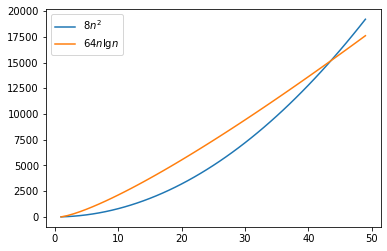

In [28]:
n = np.arange(1,50,1)
insert_sort_time = 8 * n ** 2
merge_sort_time = 64 * n * np.log2(n)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
l1 = ax.plot(n, insert_sort_time, label='$8{n^2}$')
l2 = ax.plot(n, merge_sort_time, label='$64n\lg n$')
ax.legend()

In [29]:
def f(n):
    return 8 * n ** 2 - 64 * n * np.log2(n)

fsolve(f, 43)

array([43.55926044])

- 从图中和计算结果可看出，k 的值不应过大，最大为 43

### 代码实现

In [30]:
def merge_sort_with_insertion_sort(A, k):
    _helper_function_with_insertion_sort(A, 0, len(A)-1, k)

def _helper_function_with_insertion_sort(A, p, r, k):
    if r - p > k:
        q = (p + r) // 2
        _helper_function_with_insertion_sort(A, p, q, k)
        _helper_function_with_insertion_sort(A, q+1, r, k)
        merge(A, p, q, r)
    else:
        for i in range(p+1, r+1):
            key = A[i]
            j = i - 1
            while j >= p and A[j] > key:
                A[j+1] = A[j]
                j -= 1
            A[j+1] = key

In [31]:
A = [random.randint(0,100) for i in range(10)]
print("排序前：" + str(A))
merge_sort_with_insertion_sort(A, 3)
print("排序后：" + str(A))

排序前：[5, 45, 23, 90, 20, 69, 47, 22, 46, 99]
排序后：[5, 20, 22, 23, 45, 46, 47, 69, 90, 99]


In [32]:
A = [random.random() for i in range(2 ** 20)]
B = A.copy()
fn_timer(merge_sort)(A)
for k in range(0,100,10):
    A = B.copy()
    print("k = " + str(k), end=" ")
    fn_timer(merge_sort_with_insertion_sort)(A, k)

Total time running merge_sort: 3.8125 s
k = 0 Total time running merge_sort_with_insertion_sort: 4.078125 s
k = 10 Total time running merge_sort_with_insertion_sort: 2.6875 s
k = 20 Total time running merge_sort_with_insertion_sort: 2.703125 s
k = 30 Total time running merge_sort_with_insertion_sort: 2.796875 s
k = 40 Total time running merge_sort_with_insertion_sort: 3.09375 s
k = 50 Total time running merge_sort_with_insertion_sort: 3.046875 s
k = 60 Total time running merge_sort_with_insertion_sort: 2.984375 s
k = 70 Total time running merge_sort_with_insertion_sort: 3.84375 s
k = 80 Total time running merge_sort_with_insertion_sort: 5.1875 s
k = 90 Total time running merge_sort_with_insertion_sort: 3.9375 s


## 2-2 冒泡排序的正确性

### a

需要证明 $A'$ 中元素构成 $ A $ 中元素的排列,在伪代码中，对于 $ A $ 中元素的操作只包括交换两个元素，因此可认为此条件成立

### b

循环不变式：
$$ A\left[ j - 1 \right] = \min \left\{ {A\left[ k \right],j - 1 \le k \le n} \right\} \tag{2-2 (1)} $$

初始化： $ j = n $，执行完一次循环后，满足式 （2-2 (1))

保持： 如果 $ A\left[ j \right] < A\left[ {j - 1} \right] $ ，则会交换 $A\left[ j \right]$ 和 $A\left[ j-1\right]$，如此，每次循环后，仍满足式 （2-2 (1))

终止： 当 $j = i + 1$，其仍满足式 （2-2 (1))，即是说 2 ~ 4 行执行完毕后，满足下式：
$$A\left[ {i} \right] = \min \left\{ {A\left[ k \right],i \le k \le n} \right\}{\rm{ }}\tag{2-2 (2)}$$

### c

循环不变式：
$A[0 \cdots i]$ 已按非降序排序，并且满足式 (2-2 (2))

### d

内层循环执行的次数为：
$$\sum\limits_{i = 1}^n {\left( {n - i} \right)}  = {n^2} - {{n\left( {n + 1} \right)} \over 2} = {{{n^2} - n} \over 2}$$
其运行时间为 $ \Theta(n^2) $，与插入排序的最差运行时间相同

### 代码实现

In [113]:
def bubble_sort(A):
    for i in range(len(A)-1):
        for j in reversed(range(i+1, len(A))):
            if A[j] < A[j-1]:
                A[j], A[j-1] = A[j-1], A[j]

In [114]:
A = [random.randint(0, 100) for i in range(10)]
print("A = " + str(A))
bubble_sort(A)
print("Bubble sort A: " + str(A))

A = [14, 44, 69, 27, 82, 36, 45, 55, 7, 54]
Bubble sort A: [7, 14, 27, 36, 44, 45, 54, 55, 69, 82]


## 2-3 霍纳（Horner) 规则的正确性

### a

运行时间为 $ \Theta(n) $

### b

```python
y = a_0
for i = 1 to n:
    pow_x = 1
    for j = 1 to i:
        pow_x *= x
    y += a_i * pow_x
```
运行时间为 $$\sum\limits_{i = 1}^n i  = {{n\left( {n + 1} \right)} \over 2}$$
等于 $\Theta(n^2)$ 要远大于霍纳规则

### c

最后一次循环开始时， $i=0$，代入：
$$y = \sum\limits_{k = 0}^{n - \left( {i + 1} \right)} {{a_{k + i + 1}}{x^k}} $$
可得
$$y = \sum\limits_{k = 0}^{n - 1} {{a_{k + 1}}{x^k}} $$
则循环终止时，可得
$$y = {a_0} + x\sum\limits_{k = 0}^{n - 1} {{a_{k + 1}}{x^k}}  = {a_0}{x^0} + \sum\limits_{k = 0}^{n - 1} {{a_{k + 1}}{x^{k + 1}}}  = {a_0}{x^0} + \sum\limits_{k = 1}^n {{a_k}{x^k}}  = \sum\limits_{k = 0}^n {{a_k}{x^k}} \tag{2-3 (1)} $$

### d

由式 (2-3 (1)) 可证明代码片段能正确的求解多项式的值

## 2-4 逆序对

### a

<2, 3, 8, 6, 1> 的逆序对为 (1, 5), (2, 5), (3, 4), (3, 5), (4, 5)

### b

构成的降序数组具有最多的逆序对，最多有：
$$\sum\limits_{i = 1}^n {\left( {i - 1} \right) = {{n\left( {n - 1} \right)} \over 2}} $$

### c

逆序对越多，运行时间越长。

因为插入排序移动数组元素时，仅针对逆序对，逆序对越多，其所要进行的操作越多

### d

#### 代码

In [189]:
def get_inversions(A):
    B = A.copy()
    return get_inversions_helper_function(B, 0, len(B)-1)

def get_inversions_helper_function(A, p, r):
    reverse_orders = 0
    if p < r:
        q = (p + r) // 2
        reverse_orders += get_inversions_helper_function(A, p, q)
        reverse_orders += get_inversions_helper_function(A, q+1, r)
        reverse_orders += merge_for_get_inversions(A, p, q, r)
    return reverse_orders

def merge_for_get_inversions(A, p, q, r):
    reverse_orders = 0
    L = A[p:q+1]
    L.append(float('inf'))
    R = A[q+1:r+1]
    R.append(float('inf'))
    i = j = 0
    for k in range(p,r+1):
        if L[i] <= R[j]:
            A[k] = L[i]
            i += 1
        else:
            reverse_orders += len(L) - 1 - i
            A[k] = R[j]
            j += 1
    return reverse_orders

In [192]:
A = [random.randint(1,20) for i in range(5)]
#A = [5, 4, 3, 2, 1]
print("A = " + str(A))
print("The reverse orders in A is " + str(get_inversions(A)))

A = [2, 14, 5, 4, 8]
The reverse orders in A is 4


#### 主要思路

借助合并排序来实现统计，对于合并排序的两个数组，其左右均是排好序的数组，如下式：
$$\underbrace {\left[ {\matrix{
    \cdots  & {L\left[ i \right]} &  \cdots   \cr 
 } } \right]}_{L:q - p + 1} \leftrightarrow \underbrace {\left[ {\matrix{
    \cdots  & {R\left[ j \right]} &  \cdots   \cr 
 } } \right]}_{R:r - p}$$
 
如果左边数组存在一个元素 $L\left[ i \right] > R\left[ j \right]$, 由于左边均是排好序的数组,则有下式成立:
$$L\left[ k \right] > R\left[ j \right]{\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} k \ge i$$

因此对于数组 $ A $ 来说,  $\left( {L(k),R(j)} \right)$ 为逆序对, 其中 $i \le k < len\left( L \right) - 1$

则可由下式计算逆序对,(数组索引从 0 开始, 且 $ L $ 最后一个元素为$+\infty $), 
$$ len(L) - 1 - i \tag{2-4 (1)}$$

L, R 末尾添加的 $+\infty $ 不会影响结果,因为左边数组 $+\infty $ 的下标为 $ len(L) - 1$ ,此时式 (2-4 (1)) 结果为 0 ,不会影响整体的结果

$L\left[ i \right] > R\left[ j \right]$ 只要出现一次, $j$ 就会加 1,因此不会存在重复统计的情况

两个子数组合并后,可以按照相同的方法向上递推,最终得到整个数组的逆序对